<b>Loading<b>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

 <b>Train and Test split<b>

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()
#scaling down to [0,1]
xtrain = xtrain/255.0
xtest = xtest/255.0
#flatting array
xtrain = xtrain.reshape(-1,28*28);
xtest = xtest.reshape(-1,28*28)
#Encoding
ytrain = keras.utils.to_categorical(ytrain,10)
ytest = keras.utils.to_categorical(ytest,10)

In [3]:
#Model Creation
model = keras.Sequential([
    keras.layers.Dense(512,activation="relu",input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

C:\Users\msaak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [5]:
hish = model.fit(xtrain,ytrain,batch_size=128,validation_split=0.2,epochs=30,verbose=1)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7932 - loss: 0.6383 - val_accuracy: 0.9624 - val_loss: 0.1232
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9561 - loss: 0.1494 - val_accuracy: 0.9713 - val_loss: 0.0983
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9674 - loss: 0.1104 - val_accuracy: 0.9712 - val_loss: 0.0920
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9737 - loss: 0.0872 - val_accuracy: 0.9711 - val_loss: 0.0940
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9786 - loss: 0.0689 - val_accuracy: 0.9780 - val_loss: 0.0749
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9817 - loss: 0.0596 - val_accuracy: 0.9762 - val_loss: 0.0820
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9819 - loss: 0.0590 - val_accuracy: 0.9756 - val_loss: 0.0829
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9843 - loss: 0.0493 - val_a

<b>Loss and Accuracy<b>

In [6]:
loss,accuracy = model.evaluate(xtest,ytest,verbose=0)
print("Loss:",loss)
print("Accuracy:",accuracy)

Loss: 0.07850270718336105
Accuracy: 0.9822999835014343


In [7]:
ypred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<b>Confusion Matrix<b>

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

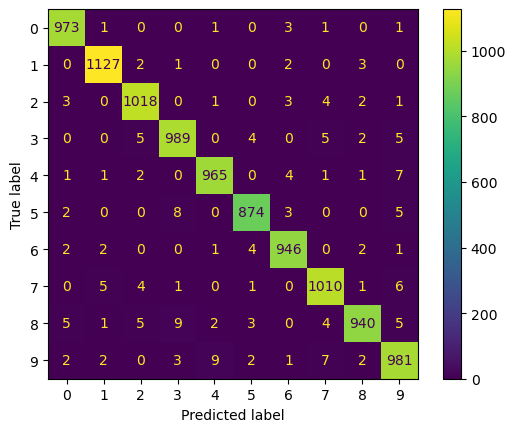

In [9]:
ypredClass = np.argmax(ypred,axis=1)
ytestClass = np.argmax(ytest,axis=1)
ccs = confusion_matrix(ytestClass,ypredClass)
cc = ConfusionMatrixDisplay(confusion_matrix=ccs)
cc.plot()

<b>Classification Report<b>

In [10]:
from sklearn.metrics import classification_report

In [11]:
cp = classification_report(ytestClass,ypredClass)
print(cp)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<b>Data Visualization<b>

<b>Loss<b>

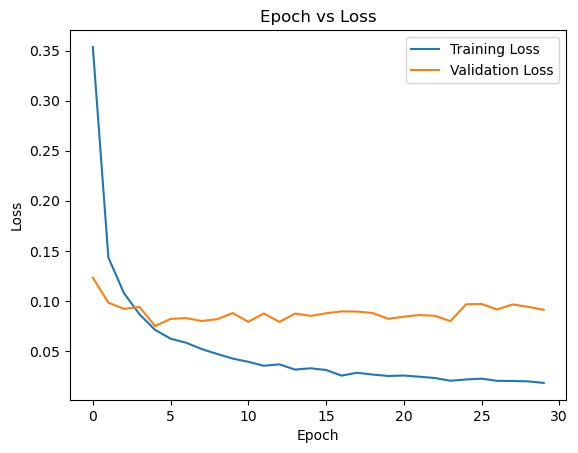

In [12]:
plt.plot(hish.history['loss'],label="Training Loss")
plt.plot(hish.history['val_loss'],label="Validation Loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

<b>Accuracy<b>

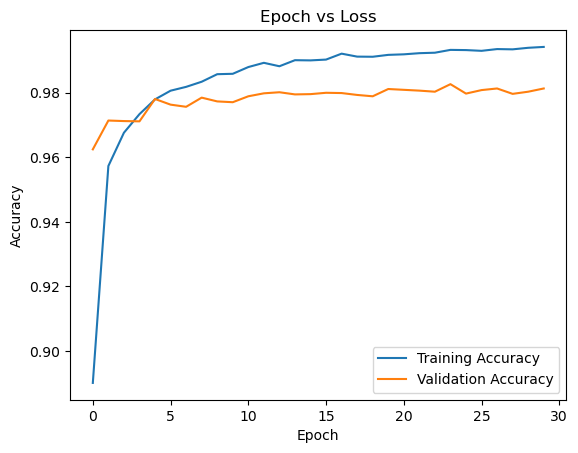

In [13]:
plt.plot(hish.history['accuracy'],label="Training Accuracy")
plt.plot(hish.history['val_accuracy'],label="Validation Accuracy")
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()